In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade geopandas pyshp shapely descartes rasterio

### Import libraries

In [3]:
import io, requests, os, json

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.plot import show, show_hist
from rasterio.mask import mask

import matplotlib as mpl
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Land use

In [31]:
newzealand = gpd.read_file('/content/drive/MyDrive/geospatial/NZ/NZL_AL2_New Zealand_GEZ.json')

https://environment.govt.nz/facts-and-science/science-and-data/new-zealand-land-use-map/

In [4]:
NZ_landuse = gpd.read_file('/content/drive/MyDrive/geospatial/NZ/lucas-nz-land-use-map-2020-v003.shp')

In [5]:
NZ_landuse.head(1)

,LUCID_2020,SUBID_2020,START_2020,LUCID_2016,SUBID_2016,START_2016,LUCID_2012,SUBID_2012,START_2012,LUCID_2007,...,START_2007,LUCID_1989,SUBID_1989,START_1989,MAP_YEAR,ISLAND_ID,LUM_REG_ID,AREA_HA,Shape_Leng,geometry
0,71 - Natural Forest,120 - Shrubland,NaN,71 - Natural Forest,120 - Shrubland,NaN,71 - Natural Forest,120 - Shrubland,NaN,71 - Natural Forest,...,NaN,71 - Natural Forest,120 - Shrubland,NaN,2020,1 - North Island,1 - Northland,1.978597,668.823782,"POLYGON ((1649204.899 6063968.201, 1649209.200..."


In [6]:
NZ_landuse['LUCID_2020'].unique()

array(['71 - Natural Forest', '75 - Grassland - High producing',
       '73 - Post 1989 Forest', '74 - Grassland - With woody biomass',
       '82 - Other', '81 - Settlements or built-up area',
       '76 - Grassland - Low producing', '79 - Wetland - Open water',
       '72 - Planted Forest - Pre 1990',
       '80 - Wetland - Vegetated non forest', '78 - Cropland - Annual',
       '77 - Cropland - Orchards and vineyards (perennial)'], dtype=object)

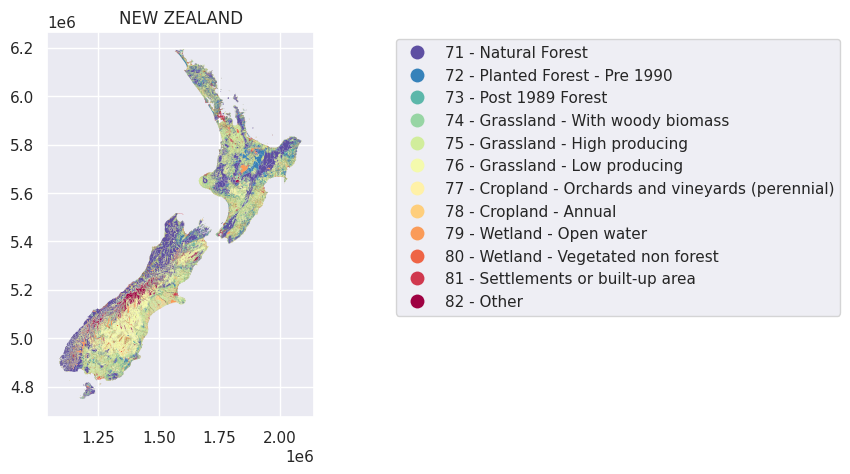

In [8]:
cmap = 'Spectral_r'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND')

NZ_landuse.plot(ax=ax, column='LUCID_2020', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((3, 1))  # (horizontal, vertical)

plt.show()

In [9]:
NZ_natural = NZ_landuse[NZ_landuse['LUCID_2020'] == '71 - Natural Forest']

In [10]:
NZ_post = NZ_landuse[NZ_landuse['LUCID_2020'] == '73 - Post 1989 Forest']

### Natural forests

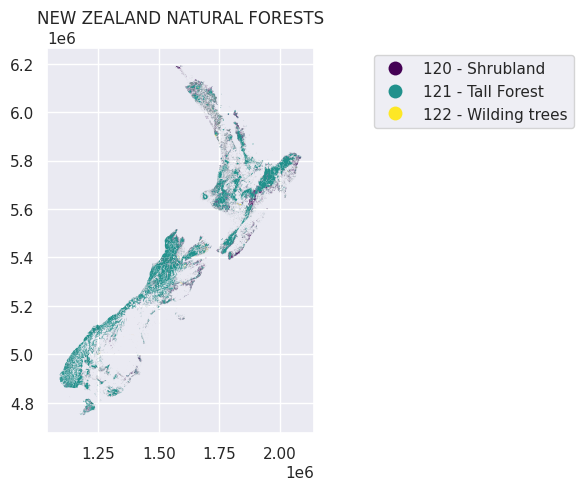

In [13]:
cmap = 'viridis'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND NATURAL FORESTS')

NZ_natural.plot(ax=ax, column='SUBID_2020', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1))  # (horizontal, vertical)

plt.show()

In [28]:
NZ_eco = gpd.read_file('/content/drive/MyDrive/geospatial/NZ_eco.shp')

In [ ]:
# Reproject CRS
if NZ_eco.crs != NZ_natural.crs:
    NZ_natural = NZ_natural.to_crs(NZ_eco.crs)

In [ ]:
NZ_forest_eco = NZ_eco.clip(NZ_natural)

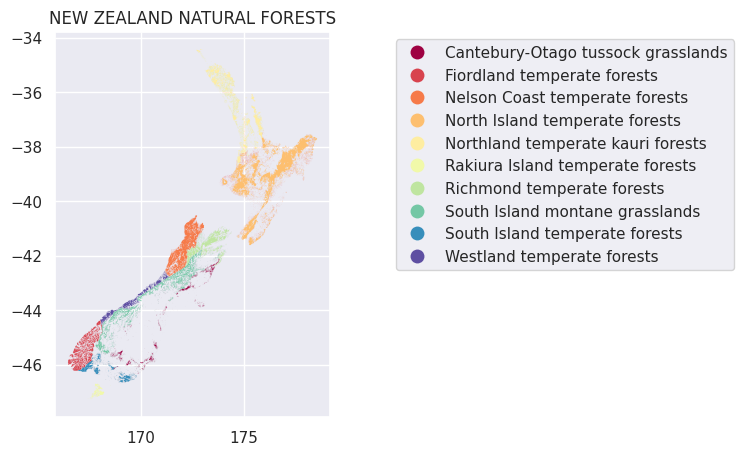

In [ ]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND NATURAL FORESTS')

NZ_forest_eco.plot(ax=ax, column='ECO_NAME', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2.5, 1))  # (horizontal, vertical)

plt.show()

### Post-1989 forest

In [35]:
# Reproject CRS
if NZ_eco.crs != NZ_post.crs:
    NZ_post = NZ_post.to_crs(NZ_eco.crs)

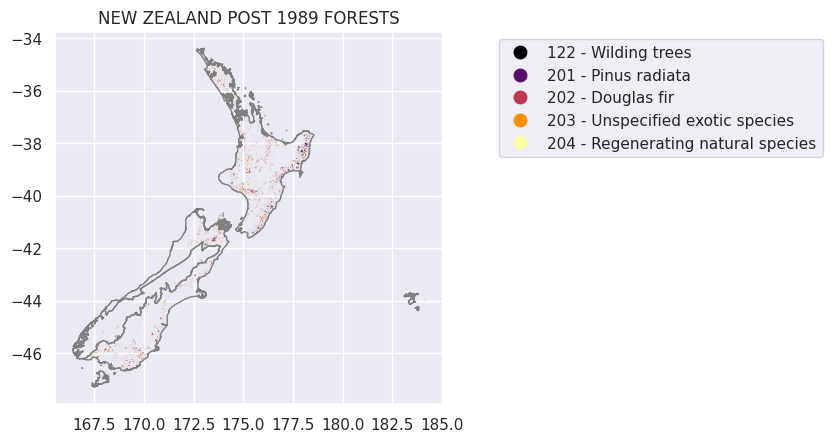

In [39]:
cmap = 'inferno'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND POST 1989 FORESTS')

NZ_post.plot(ax=ax, column='SUBID_2020', cmap=cmap, edgecolor='None', legend=True)
newzealand.plot(ax=ax, color='none', edgecolor='grey', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1))  # (horizontal, vertical)

plt.show()

### Other

In [41]:
NZ_gez = newzealand.clip(NZ_forest_eco)

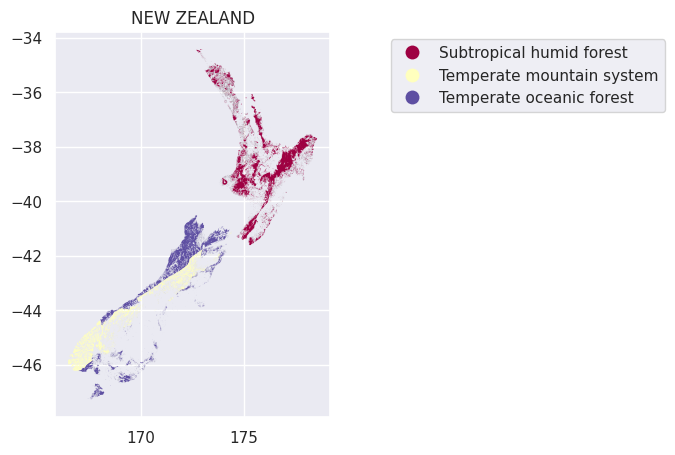

In [45]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND')

NZ_gez.plot(ax=ax, column='gez_name', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2.25, 1))  # (horizontal, vertical)

plt.show()

### Holdridge

In [44]:
holdridge = gpd.read_file('/content/drive/MyDrive/geospatial/HoldridgeLifeZones.json')

In [46]:
NZ_holdridge = holdridge.clip(NZ_natural)

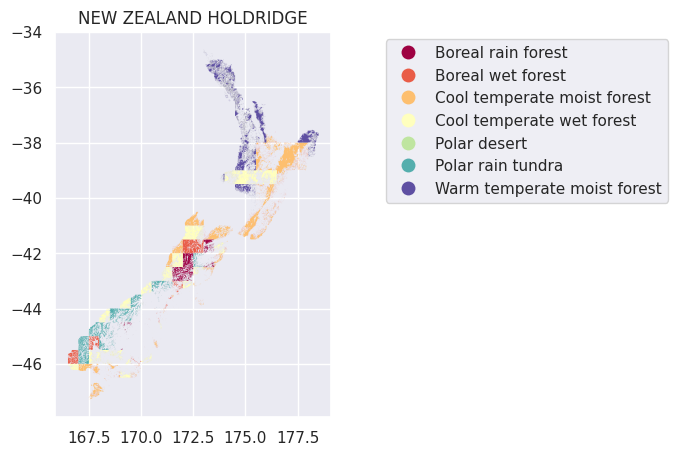

In [48]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND HOLDRIDGE')

NZ_holdridge.plot(ax=ax, column='DESC', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2.25, 1))  # (horizontal, vertical)

plt.show()